<span style="color:orange">**Note: this post is just a draft in progress. As of now, it consists of a collection of random notes.**</span>

## Initial imports

In [1]:
# Standard imports
import os

# Third-party imports
import pandas as pd
import numpy as np

# AML imports
from azure.ai.ml import command, MLClient
from azure.identity import DefaultAzureCredential

### Additional imports

In [2]:
### Multiple-metric and dataset imports
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, classification_report
import matplotlib.pyplot as plt

import mlflow
from mlflow.entities import Metric
from mlflow.tracking import MlflowClient
from mlflow.models import infer_signature

## Connecting

In [4]:
# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient.from_config (
    credential=credential
)

Found the config file in: /config.json


## Logging details

First experiment: see why the MLflow job created by hello world notebook does not log code, etc. I assume this is because we need to use `command` and create a job through  to the `ml_client`, as explained in the hello world notebook, under section `running script as a job`:

In [5]:
%%writefile hello_world_with_logs.py
import mlflow
from hello_world_core import hello_world, parse_args

def start_logging (args):
    # set name for logging
    mlflow.set_experiment("Hello World with logging")
    mlflow.start_run()
    mlflow.log_param ("name to log", args.name)
    
def finish_logging ():
    mlflow.end_run ()

def main():
    """Main function of the script."""
    args = parse_args ()
    start_logging (args)
    hello_world (args.name)
    finish_logging ()

if __name__ == "__main__":
    main()

Writing hello_world_with_logs.py


In [6]:
# configure job
job = command(
    inputs=dict(
        name="Jaume", # default value of our parameter
    ),
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_with_logs.py --name ${{inputs.name}}",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Hello World with logging and job",
)

# submit job
ml_client.create_or_update(job)

Found the config file in: /config.json
Uploading data_science (12.66 MBs): 100%|██████████| 12658976/12658976 [00:00<00:00, 18557482.88it/s]




Experiment,Name,Type,Status,Details Page
data_science,jolly_malanga_wgt7b8mb36,command,Starting,Link to Azure Machine Learning studio


### Result

In the previous example there is one error: it seems that we cannot indicate an experiment name unless it is the same as the one indicated in the command function. Since we didn't indicate any experiment name in that function, we try to do it now:

### Fixing error

In [7]:
job = command(
    inputs=dict(
        name="Jaume", # default value of our parameter
    ),
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_with_logs.py --name ${{inputs.name}}",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Hello World with logging and job",
    experiment_name="Hello World with logging",
)

# submit job
ml_client.create_or_update(job)

Uploading data_science (12.66 MBs): 100%|██████████| 12664739/12664739 [00:00<00:00, 18366160.15it/s]




Experiment,Name,Type,Status,Details Page
Hello World with logging,joyful_brick_2zb5xmvktl,command,Starting,Link to Azure Machine Learning studio


### Result

- A job is created with experiment name "Hello world with logging" and latest job name "Hello World with logging and job", which is the display_name indicated in the command function (see screenshot below)
- Both code and logs are stored as part of this job.

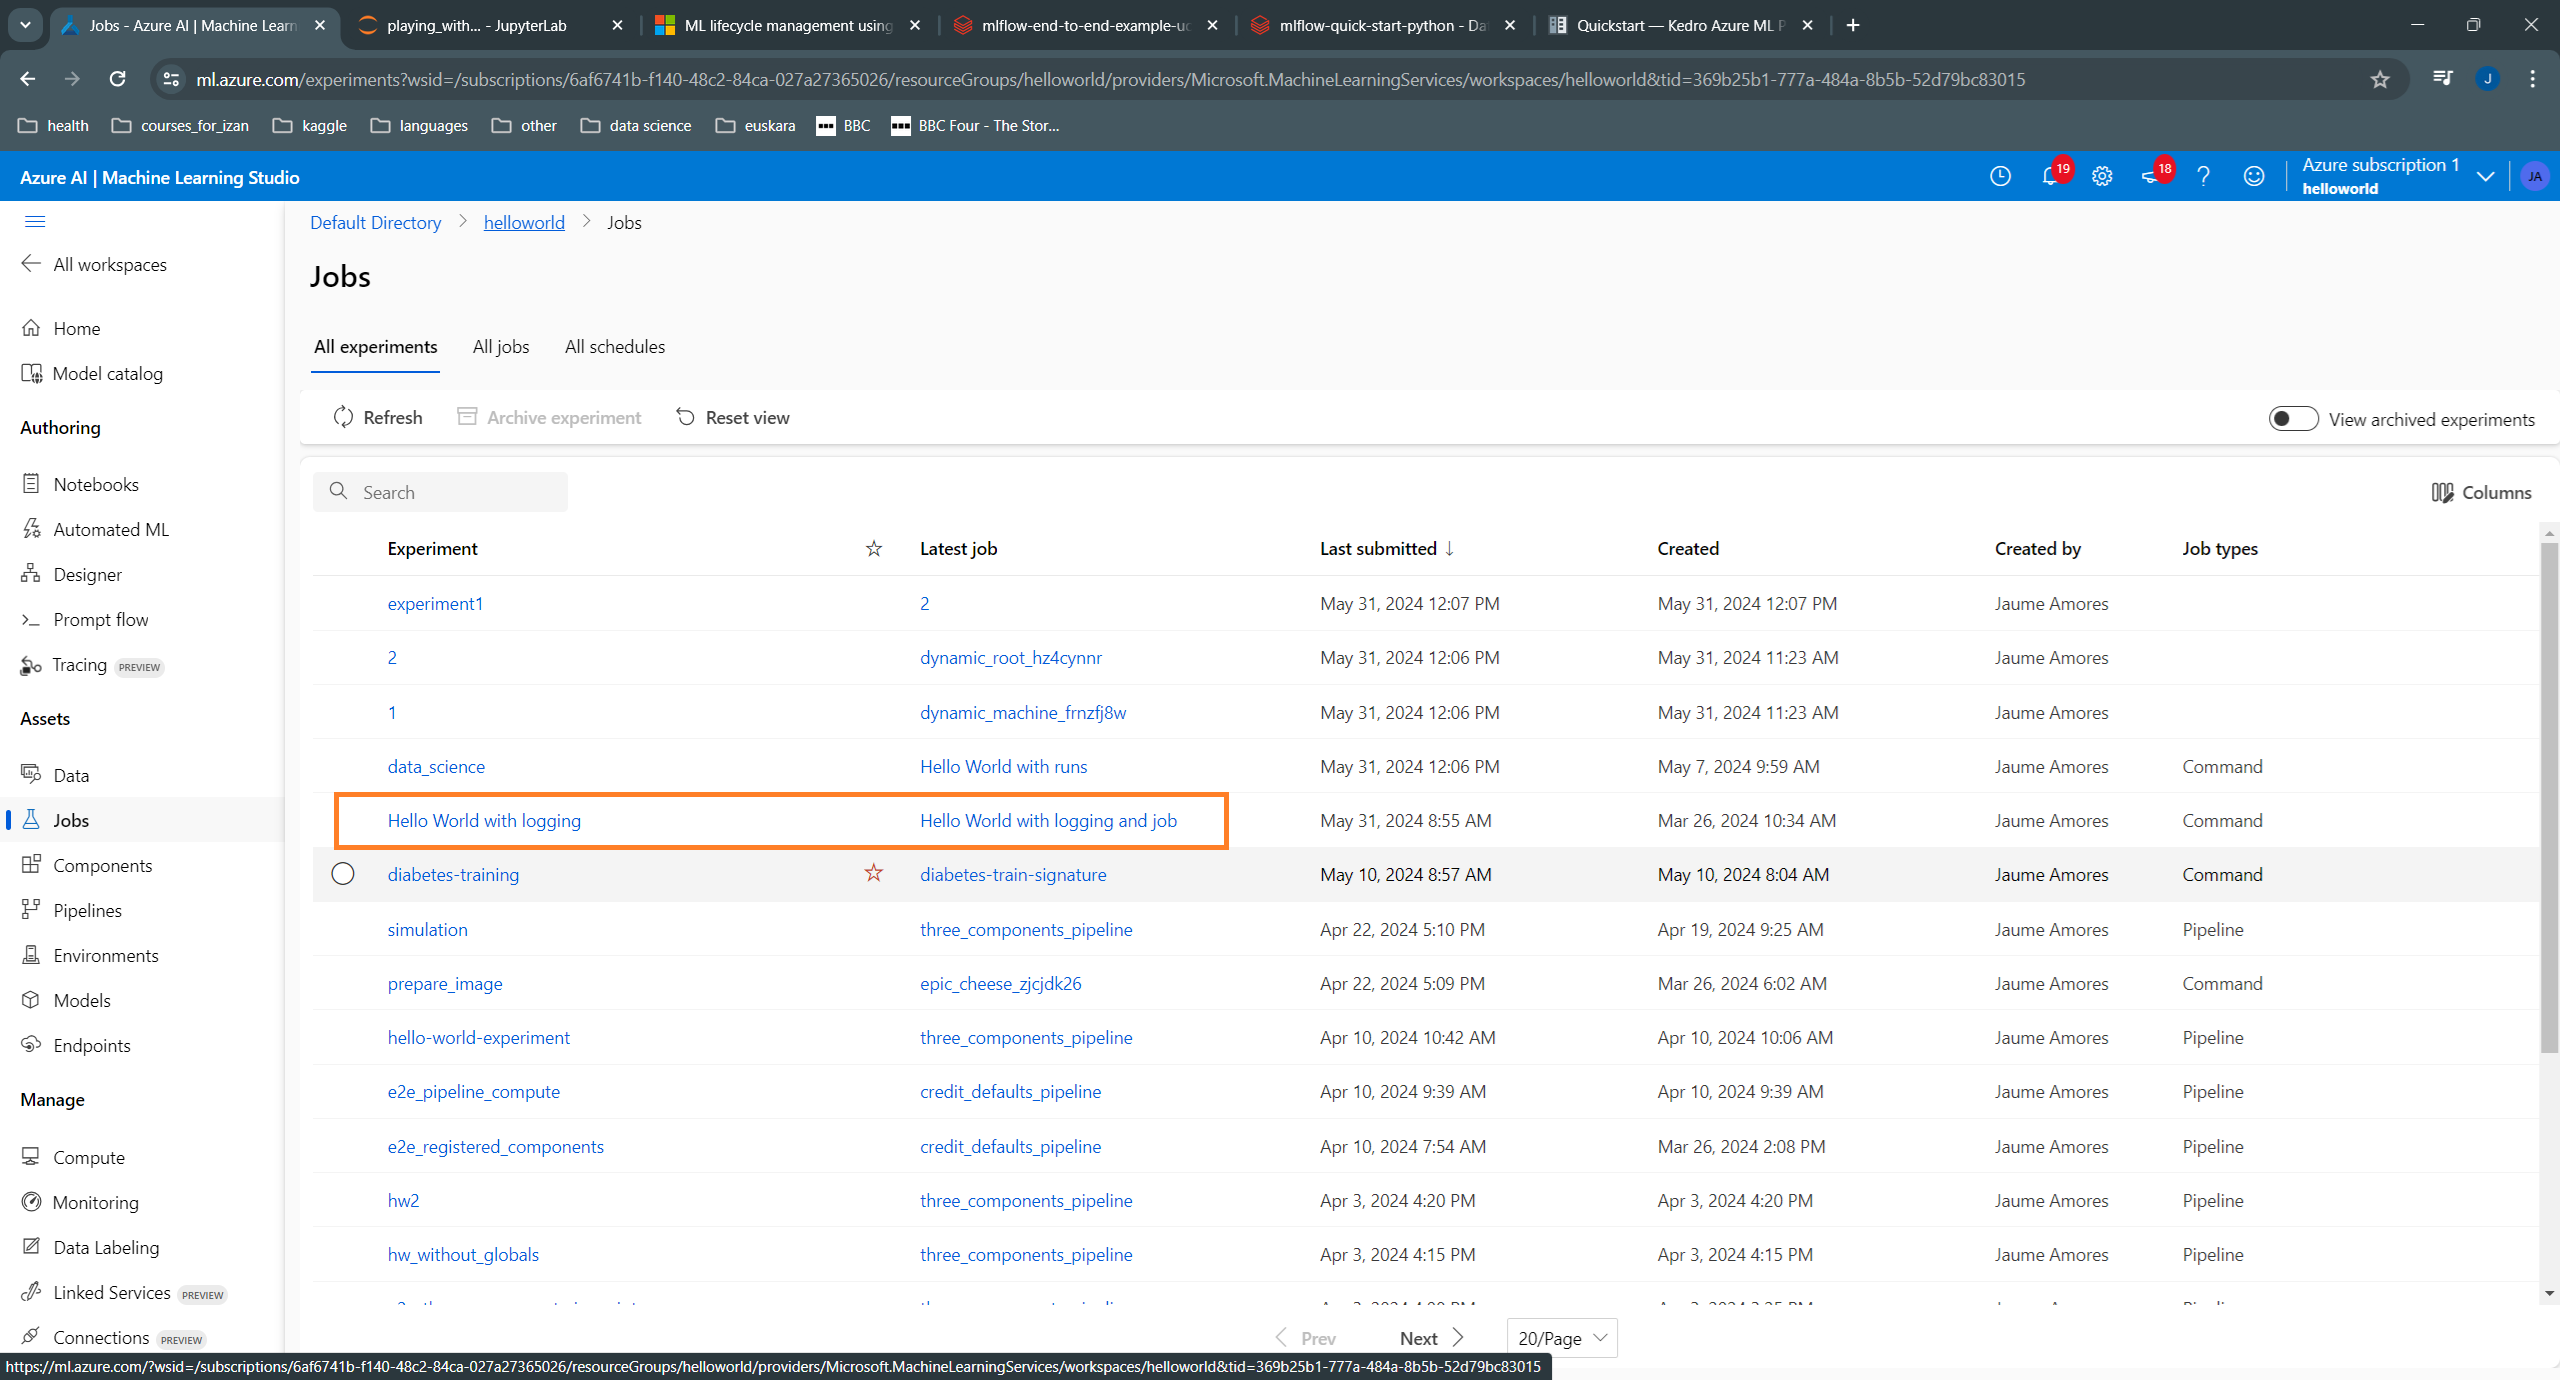

In [ ]:
- 

## Logging experiments

Links:

https://mlflow.org/docs/2.0.0/tracking.html#logging-functions

https://mlflow.org/docs/2.0.0/tracking.html#managing-experiments-and-runs-with-the-tracking-service-api

In [1]:
%%writefile hello_world_experiments.py
import mlflow
from hello_world_core import hello_world, parse_args
    
def main():
    """Main function of the script."""
    
    names = ["John", "Mary", "Ana"]
    for idx, name in enumerate(names):
        mlflow.create_experiment (str(idx))
        mlflow.start_run()
        mlflow.log_param ("name to log", name)
        mlflow.log_metric ("length", len(name))
        mlflow.end_run ()
        hello_world (name)
    
if __name__ == "__main__":
    main()

Writing hello_world_experiments.py


In [2]:
# Standard imports
import os

# Third-party imports
import pandas as pd

# AML imports
from azure.ai.ml import command, MLClient
from azure.identity import DefaultAzureCredential

# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient.from_config (
    credential=credential
)

# configure job
job = command(
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_experiments.py",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Hello World with experiments",
)

# submit job
ml_client.create_or_update(job)

Found the config file in: /config.json
Class AutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class AutoDeleteConditionSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseAutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class IntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class ProtectionLevelSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseIntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.

Experiment,Name,Type,Status,Details Page
data_science,witty_glove_syh5ltdkh6,command,Starting,Link to Azure Machine Learning studio


### Result

- A job "Hello World with experiments" is created under the experiment name "data_science". It seems this is the default name of the experiment if we don't indicate in the `command` function (see screenshot)

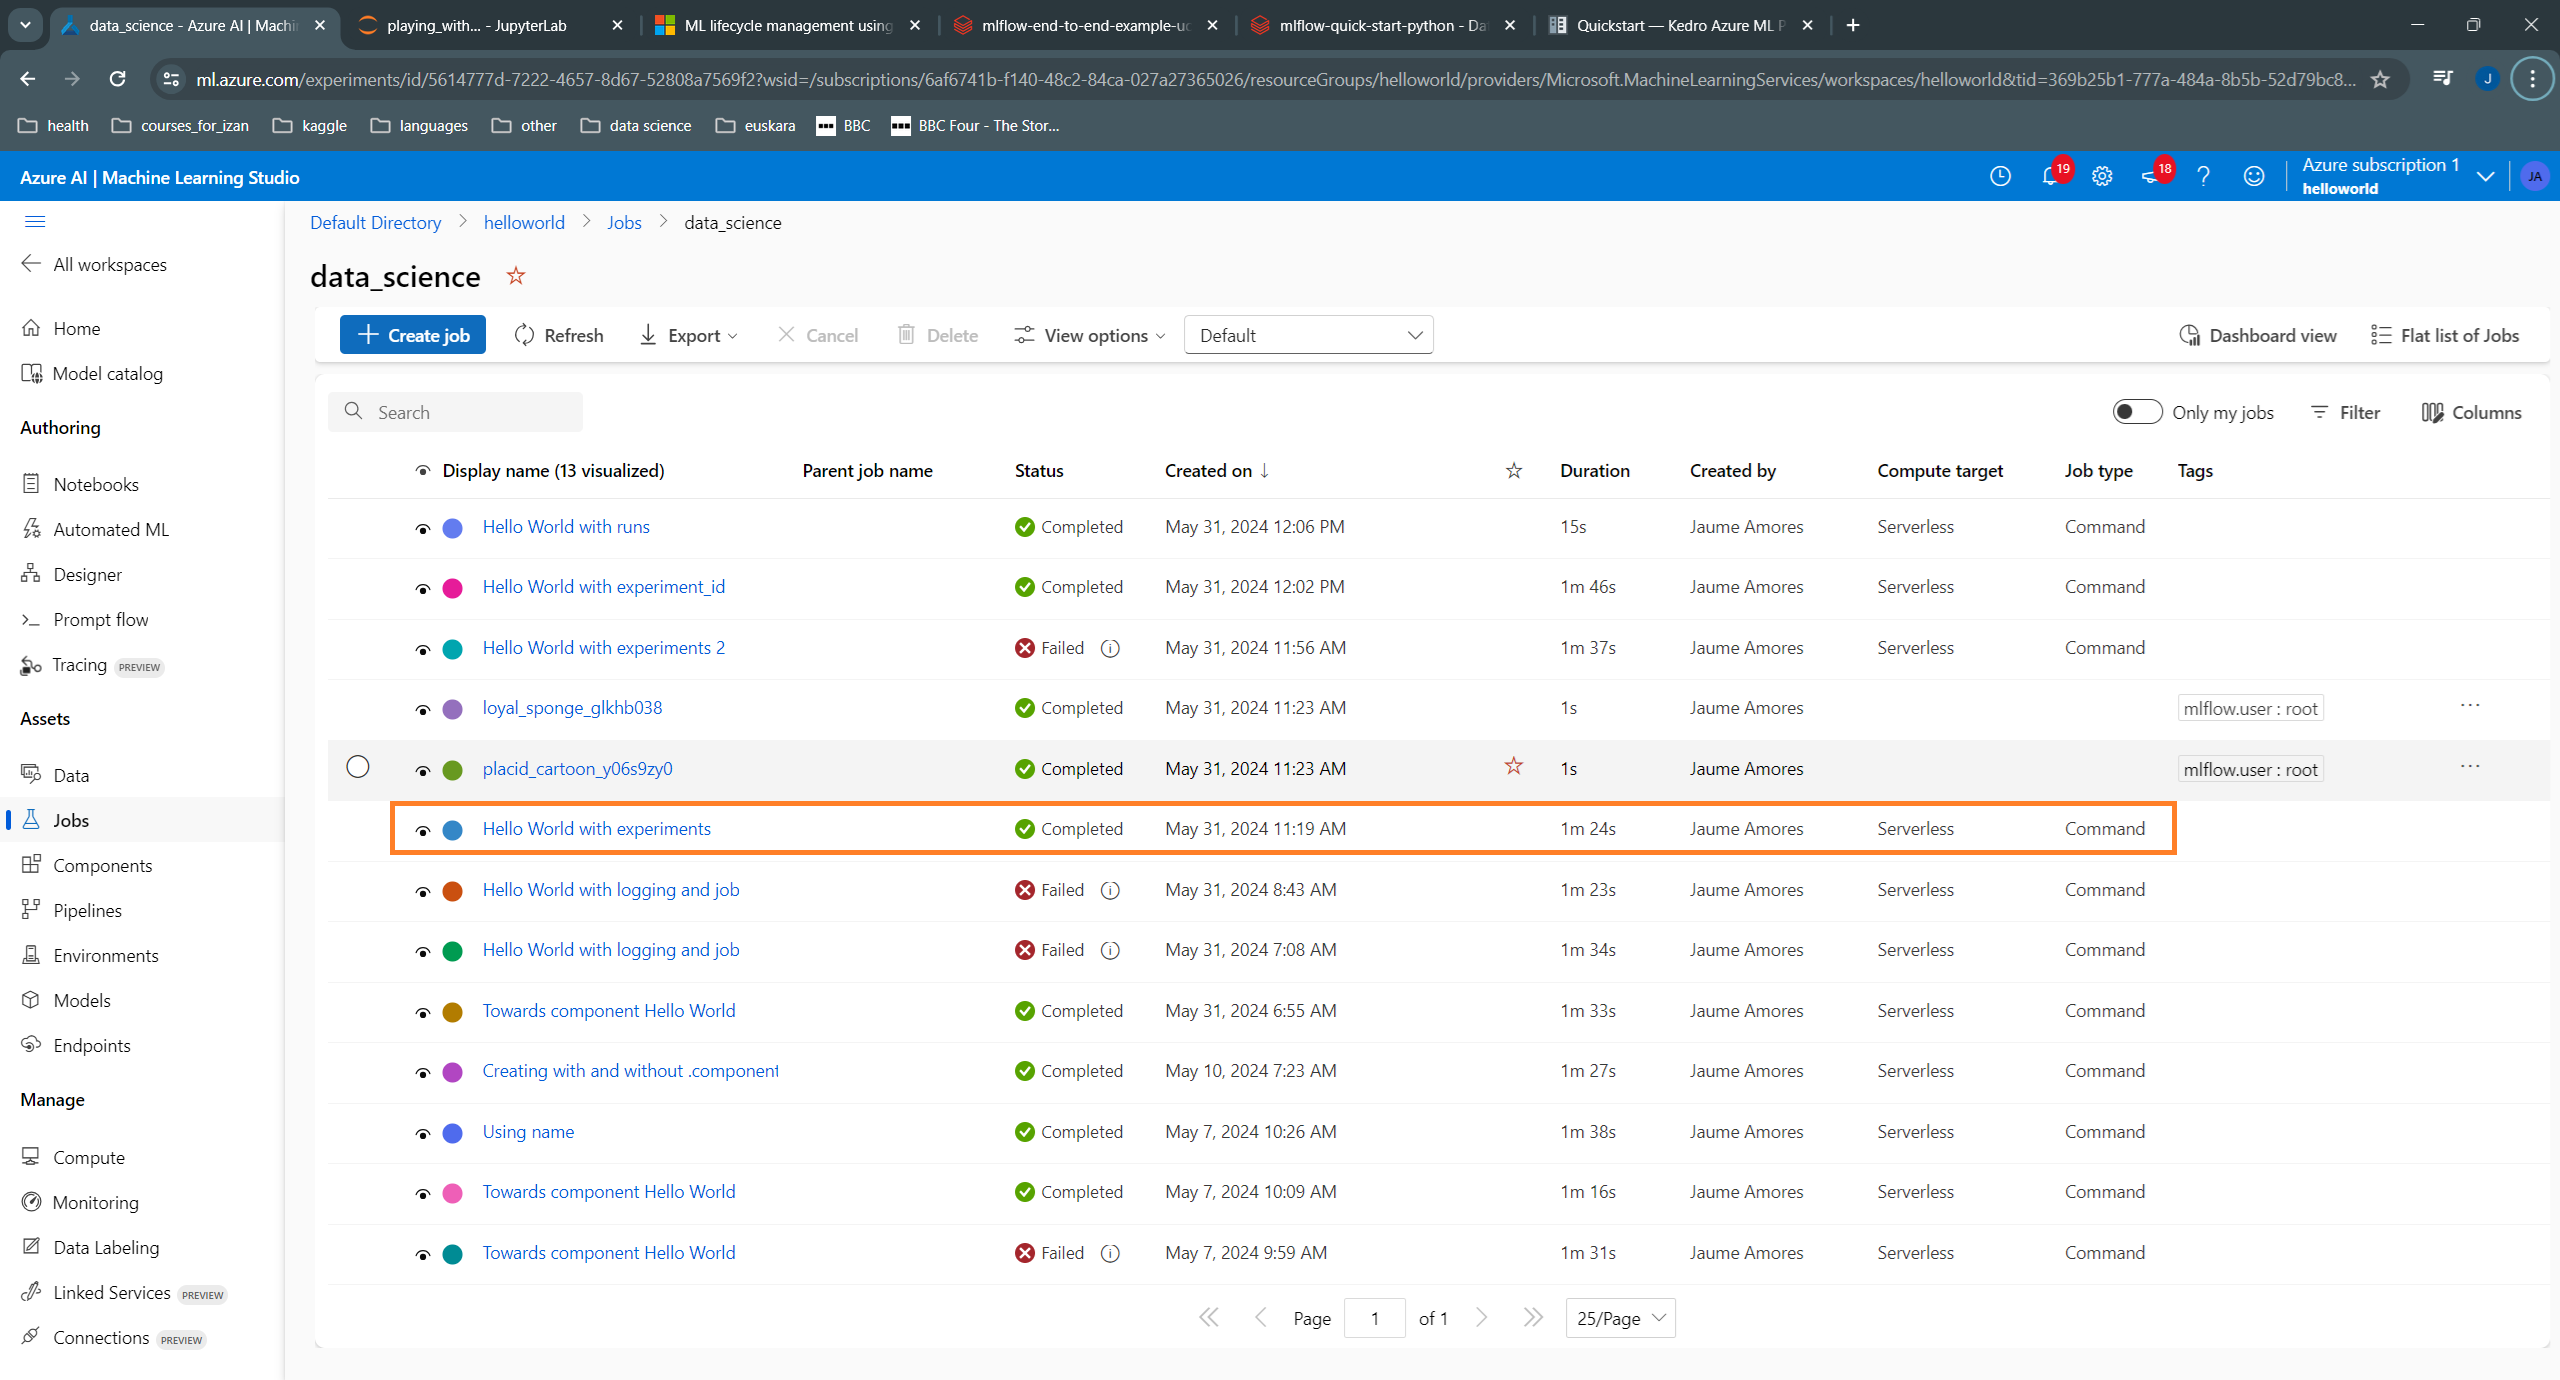

- The job has code and logs registered

## start_run receives experiment

In [3]:
%%writefile hello_world_experiments.py
import mlflow
from hello_world_core import hello_world, parse_args
    
def main():
    """Main function of the script."""
    
    names = ["John", "Mary", "Ana"]
    for idx, name in enumerate(names):
        experiment = mlflow.create_experiment (str(idx))
        mlflow.start_run(experiment)
        mlflow.log_param ("name to log", name)
        mlflow.log_metric ("length", len(name))
        mlflow.end_run ()
        hello_world (name)
    
if __name__ == "__main__":
    main()

Overwriting hello_world_experiments.py


In [4]:
# configure job
job = command(
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_experiments.py",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Hello World with experiments 2",
)

# submit job
ml_client.create_or_update(job)

Uploading data_science (12.73 MBs): 100%|██████████| 12725904/12725904 [00:00<00:00, 16250029.70it/s]




Experiment,Name,Type,Status,Details Page
data_science,good_helmet_wgcgzlvs99,command,Starting,Link to Azure Machine Learning studio


### Result

This experiment failed, since the call to `mlflow.start_run (experiment)` is incorrect. The correct call is `mlflow.start_run(experiment_id=experiment_id)`

## start_run receives under experiment_id name

In [5]:
%%writefile hello_world_experiments_id.py
import mlflow
from hello_world_core import hello_world, parse_args
    
def main():
    """Main function of the script."""
    
    names = ["John", "Mary", "Ana"]
    for idx, name in enumerate(names):
        experiment_id = mlflow.create_experiment (str(idx))
        mlflow.start_run(experiment_id=experiment_id)
        mlflow.log_param ("name to log", name)
        mlflow.log_metric ("length", len(name))
        mlflow.end_run ()
        hello_world (name)
    
if __name__ == "__main__":
    main()

Writing hello_world_experiments_id.py


In [6]:
# configure job
job = command(
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_experiments_id.py",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Hello World with experiment_id",
)

# submit job
ml_client.create_or_update(job)

Uploading data_science (12.74 MBs): 100%|██████████| 12741018/12741018 [00:02<00:00, 5305432.15it/s]




Experiment,Name,Type,Status,Details Page
data_science,lime_snail_kdddyl016h,command,Starting,Link to Azure Machine Learning studio


### Result

The code is uploaded to an experiment called "data_science". This experiment makes use of the first parameter value: `name="John"`. The remaining experiments (`1`, and `2`), are created separately for parameter values `"Mary"` and `"Ana"`, without code being uploaded to them.

## using separate runs instead

In [7]:
%%writefile hello_world_runs.py
import mlflow
from hello_world_core import hello_world, parse_args
    
def main():
    """Main function of the script."""
    
    names = ["John", "Mary", "Ana"]
    experiment_id = mlflow.create_experiment("experiment1")
    for idx, name in enumerate(names):
        mlflow.start_run(run_name=str(idx), experiment_id=experiment_id)
        mlflow.log_param ("name to log", name)
        mlflow.log_metric ("length", len(name))
        mlflow.end_run ()
        hello_world (name)
    
if __name__ == "__main__":
    main()

Writing hello_world_runs.py


In [9]:
# configure job
job = command(
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_runs.py",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Hello World with runs",
)

# submit job
ml_client.create_or_update(job)

Uploading data_science (12.75 MBs): 100%|██████████| 12749252/12749252 [00:00<00:00, 18741643.65it/s]




Experiment,Name,Type,Status,Details Page
data_science,olive_shelf_r4fzsl1f0d,command,Starting,Link to Azure Machine Learning studio


### Result

- Two runs are created under a job with experiment name "experiment1" and latest_job name `1` and `2`:
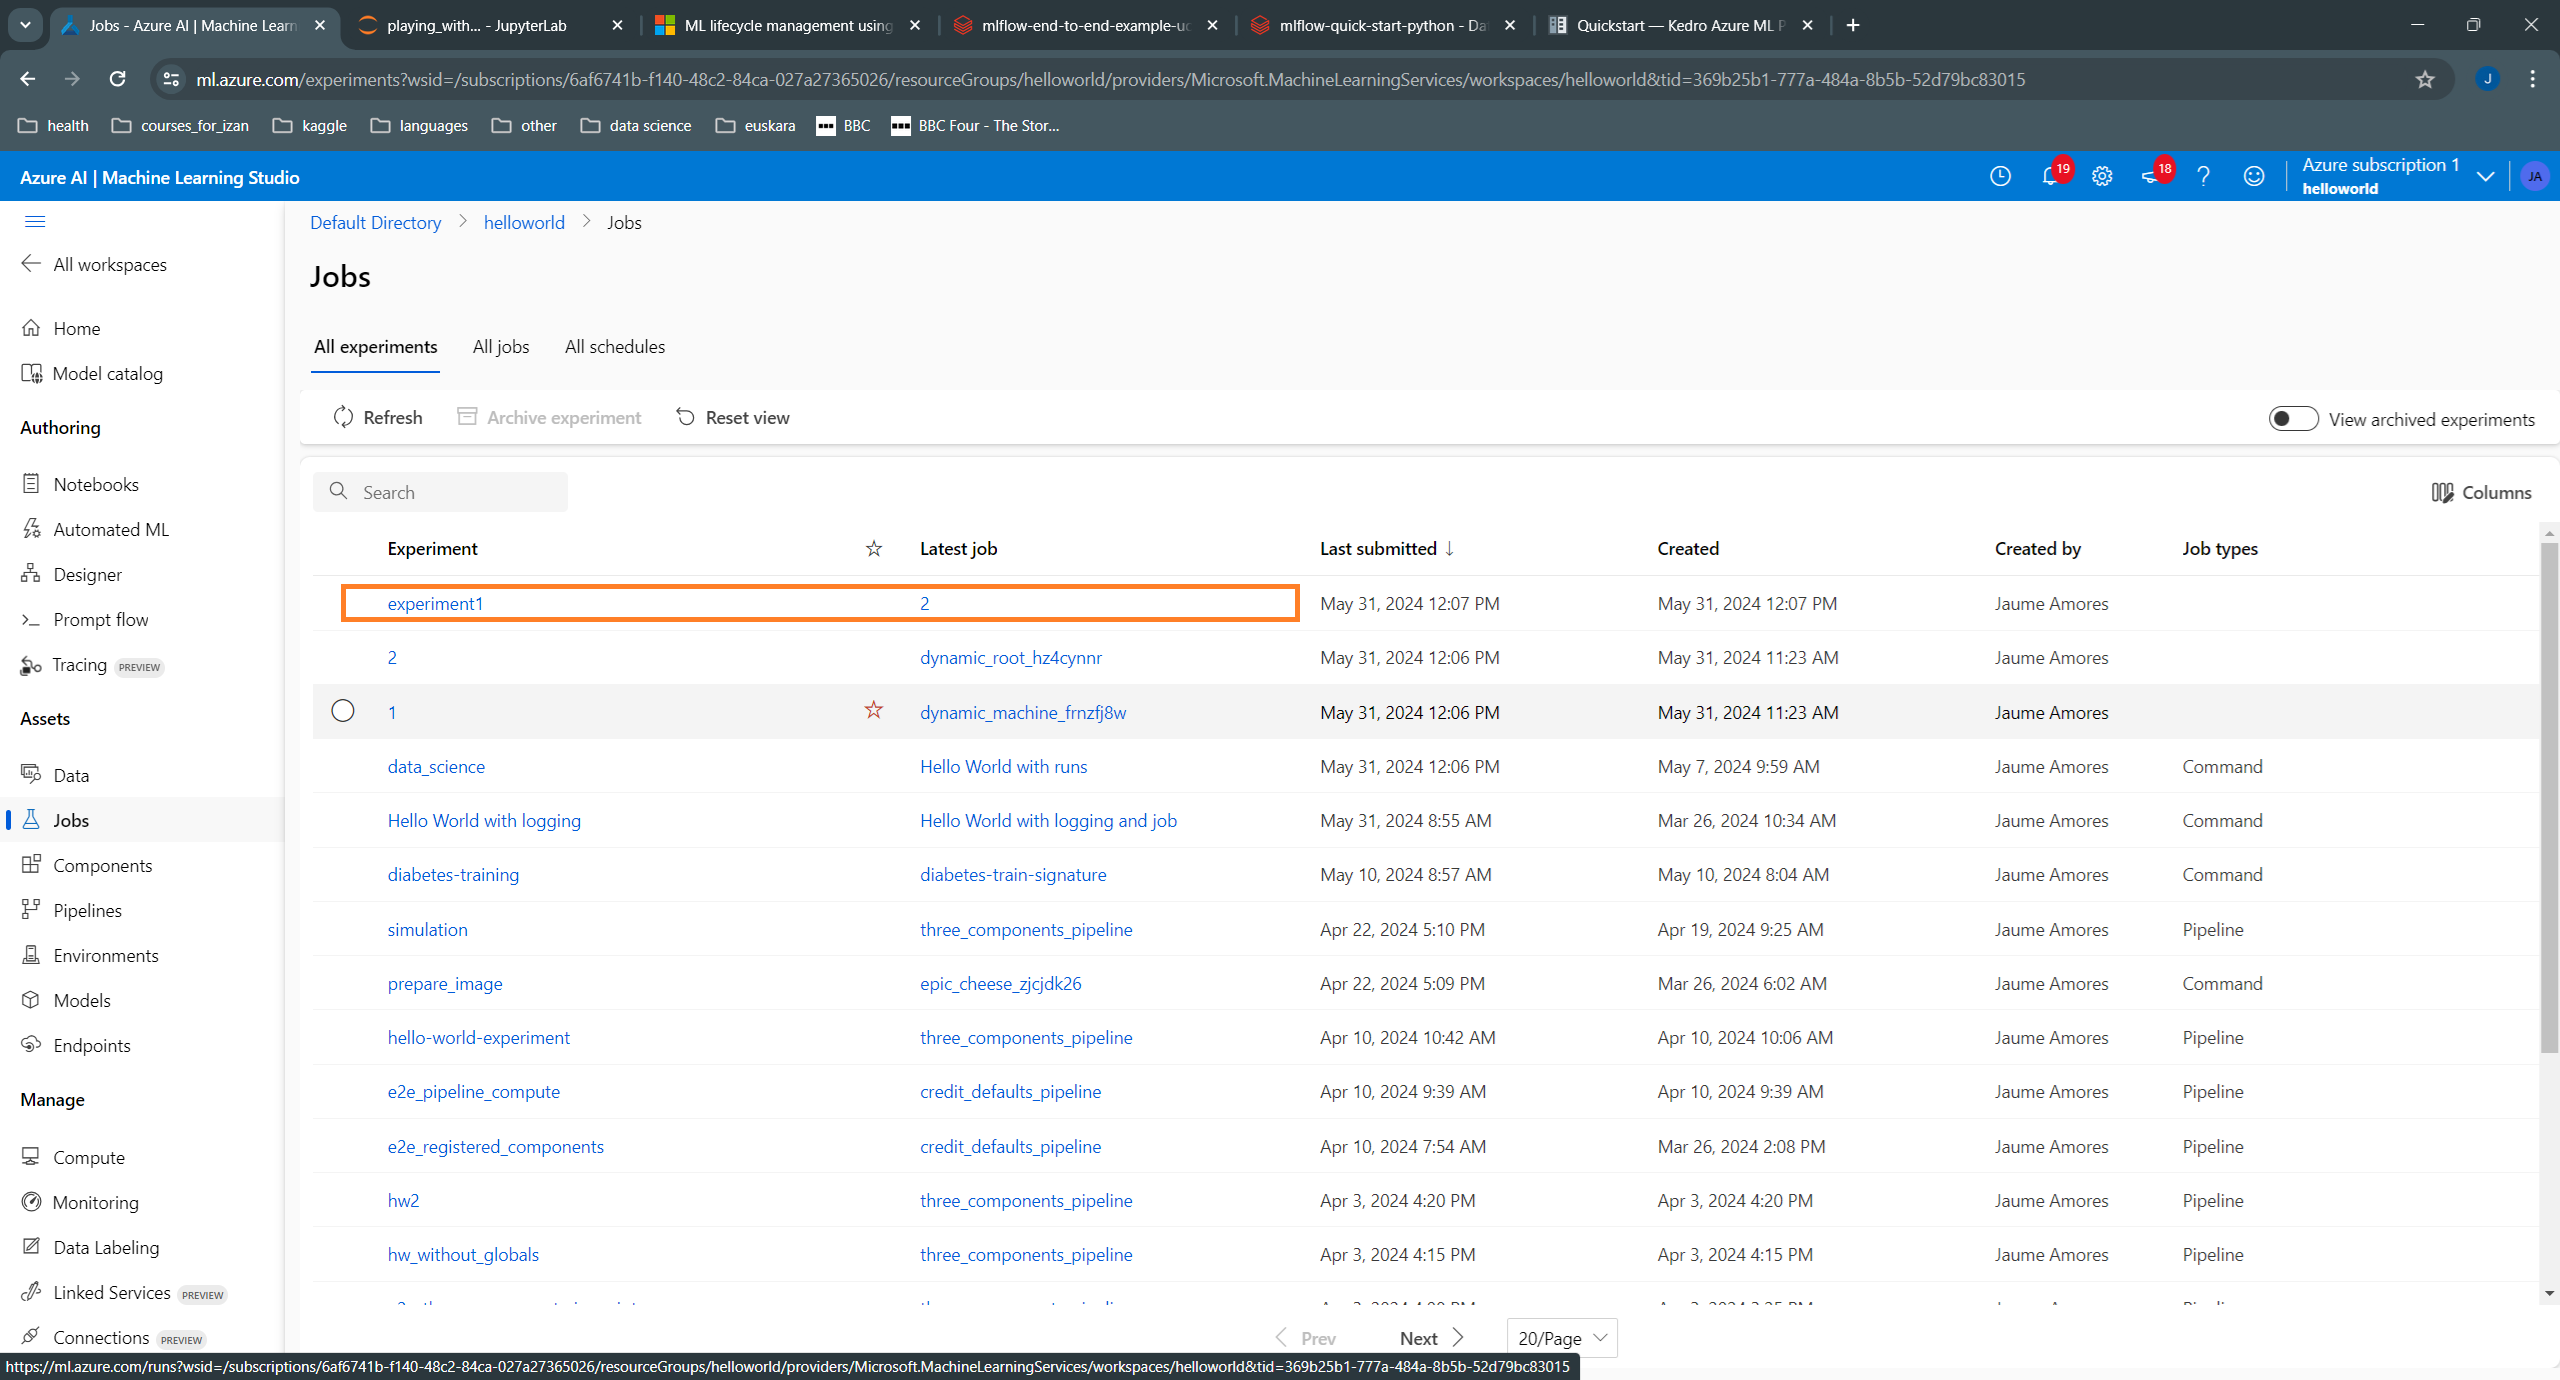

- The metric values for these can be compared using graphics:

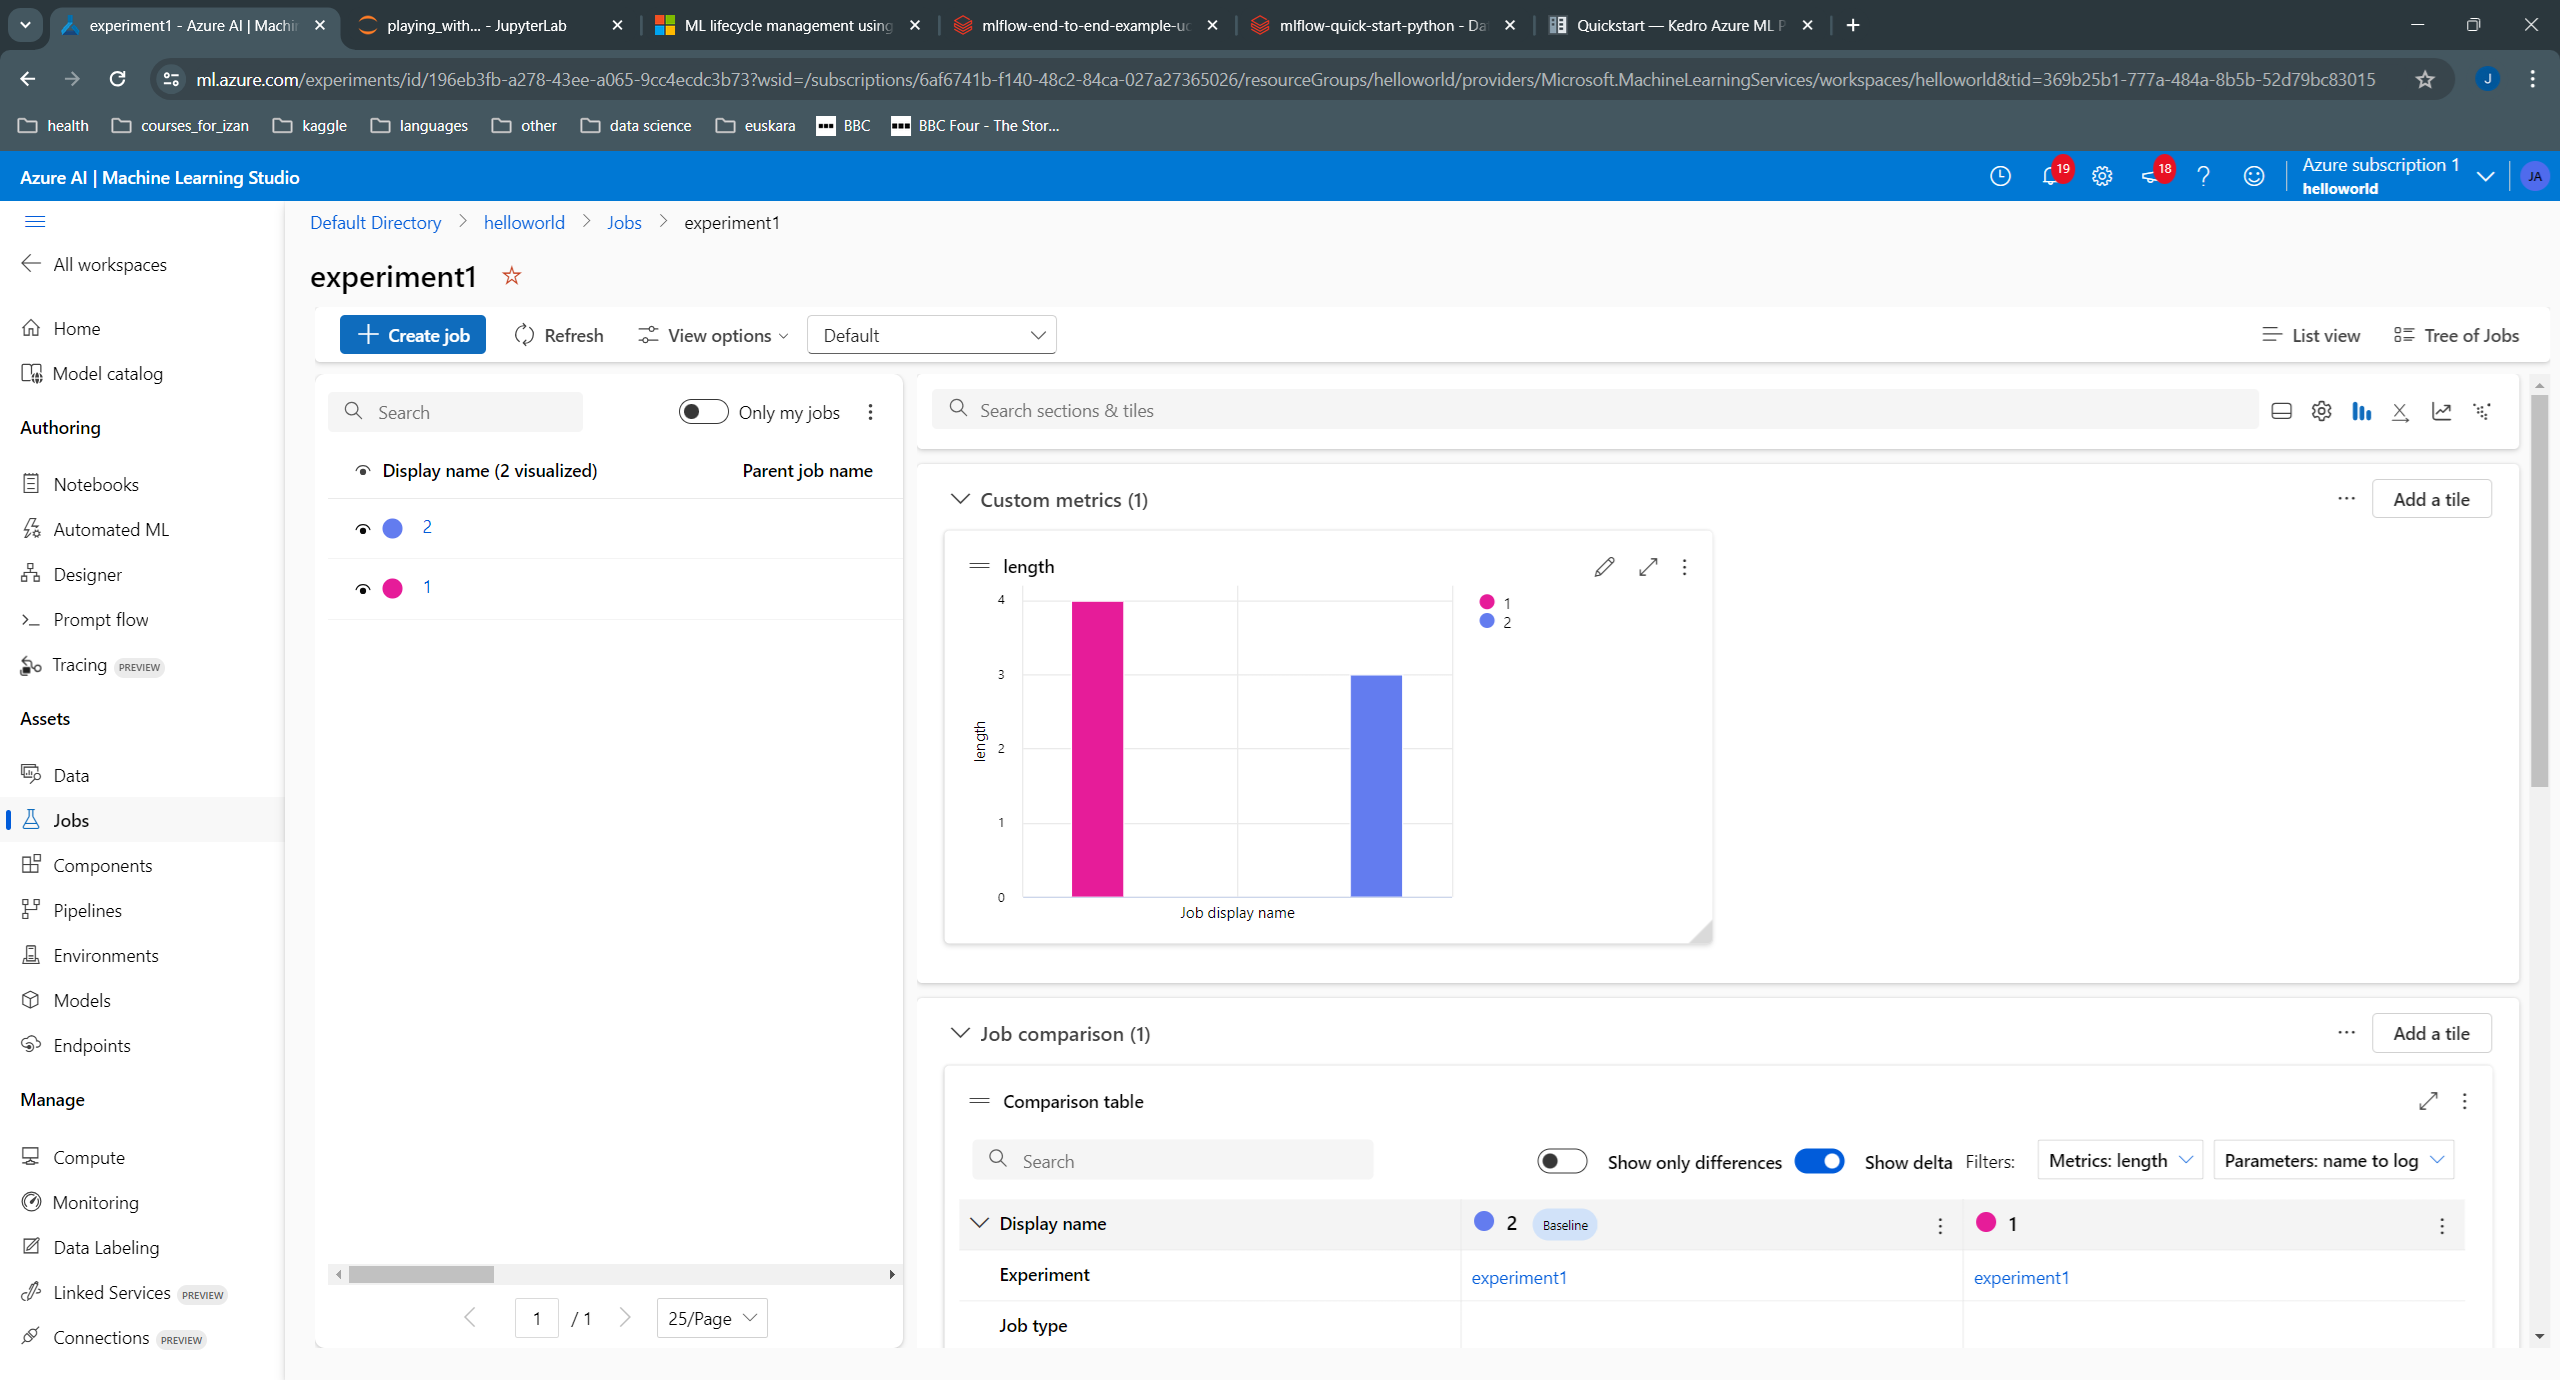

- There is still a job created under experiment name `data_science`. This job contains result of using first parameter value, code and logs. But it cannot be compared.

## Separate runs + experiment in `command`

In [1]:
%%writefile hello_world_runs_command.py
import mlflow
from hello_world_core import hello_world, parse_args
    
def main():
    """Main function of the script."""
    
    names = ["John", "Mary", "Ana"]
    for idx, name in enumerate(names):
        mlflow.start_run(run_name=str(idx))
        mlflow.log_param ("name to log", name)
        mlflow.log_metric ("length", len(name))
        mlflow.end_run ()
        hello_world (name)
    
if __name__ == "__main__":
    main()

Writing hello_world_runs_command.py


In [5]:
# configure job
job = command(
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_runs_command.py",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    experiment_name="hw_runs_command",
    display_name="Hello World with runs + command",
)

# submit job
ml_client.create_or_update(job)

Class AutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class AutoDeleteConditionSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseAutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class IntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class ProtectionLevelSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseIntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Uploading data_science (17.09 MBs): 10

Experiment,Name,Type,Status,Details Page
hw_runs_command,jolly_bone_c07ncly80l,command,Starting,Link to Azure Machine Learning studio


### Result

- We have the three runs under the same experiment, and we can compare their metrics:

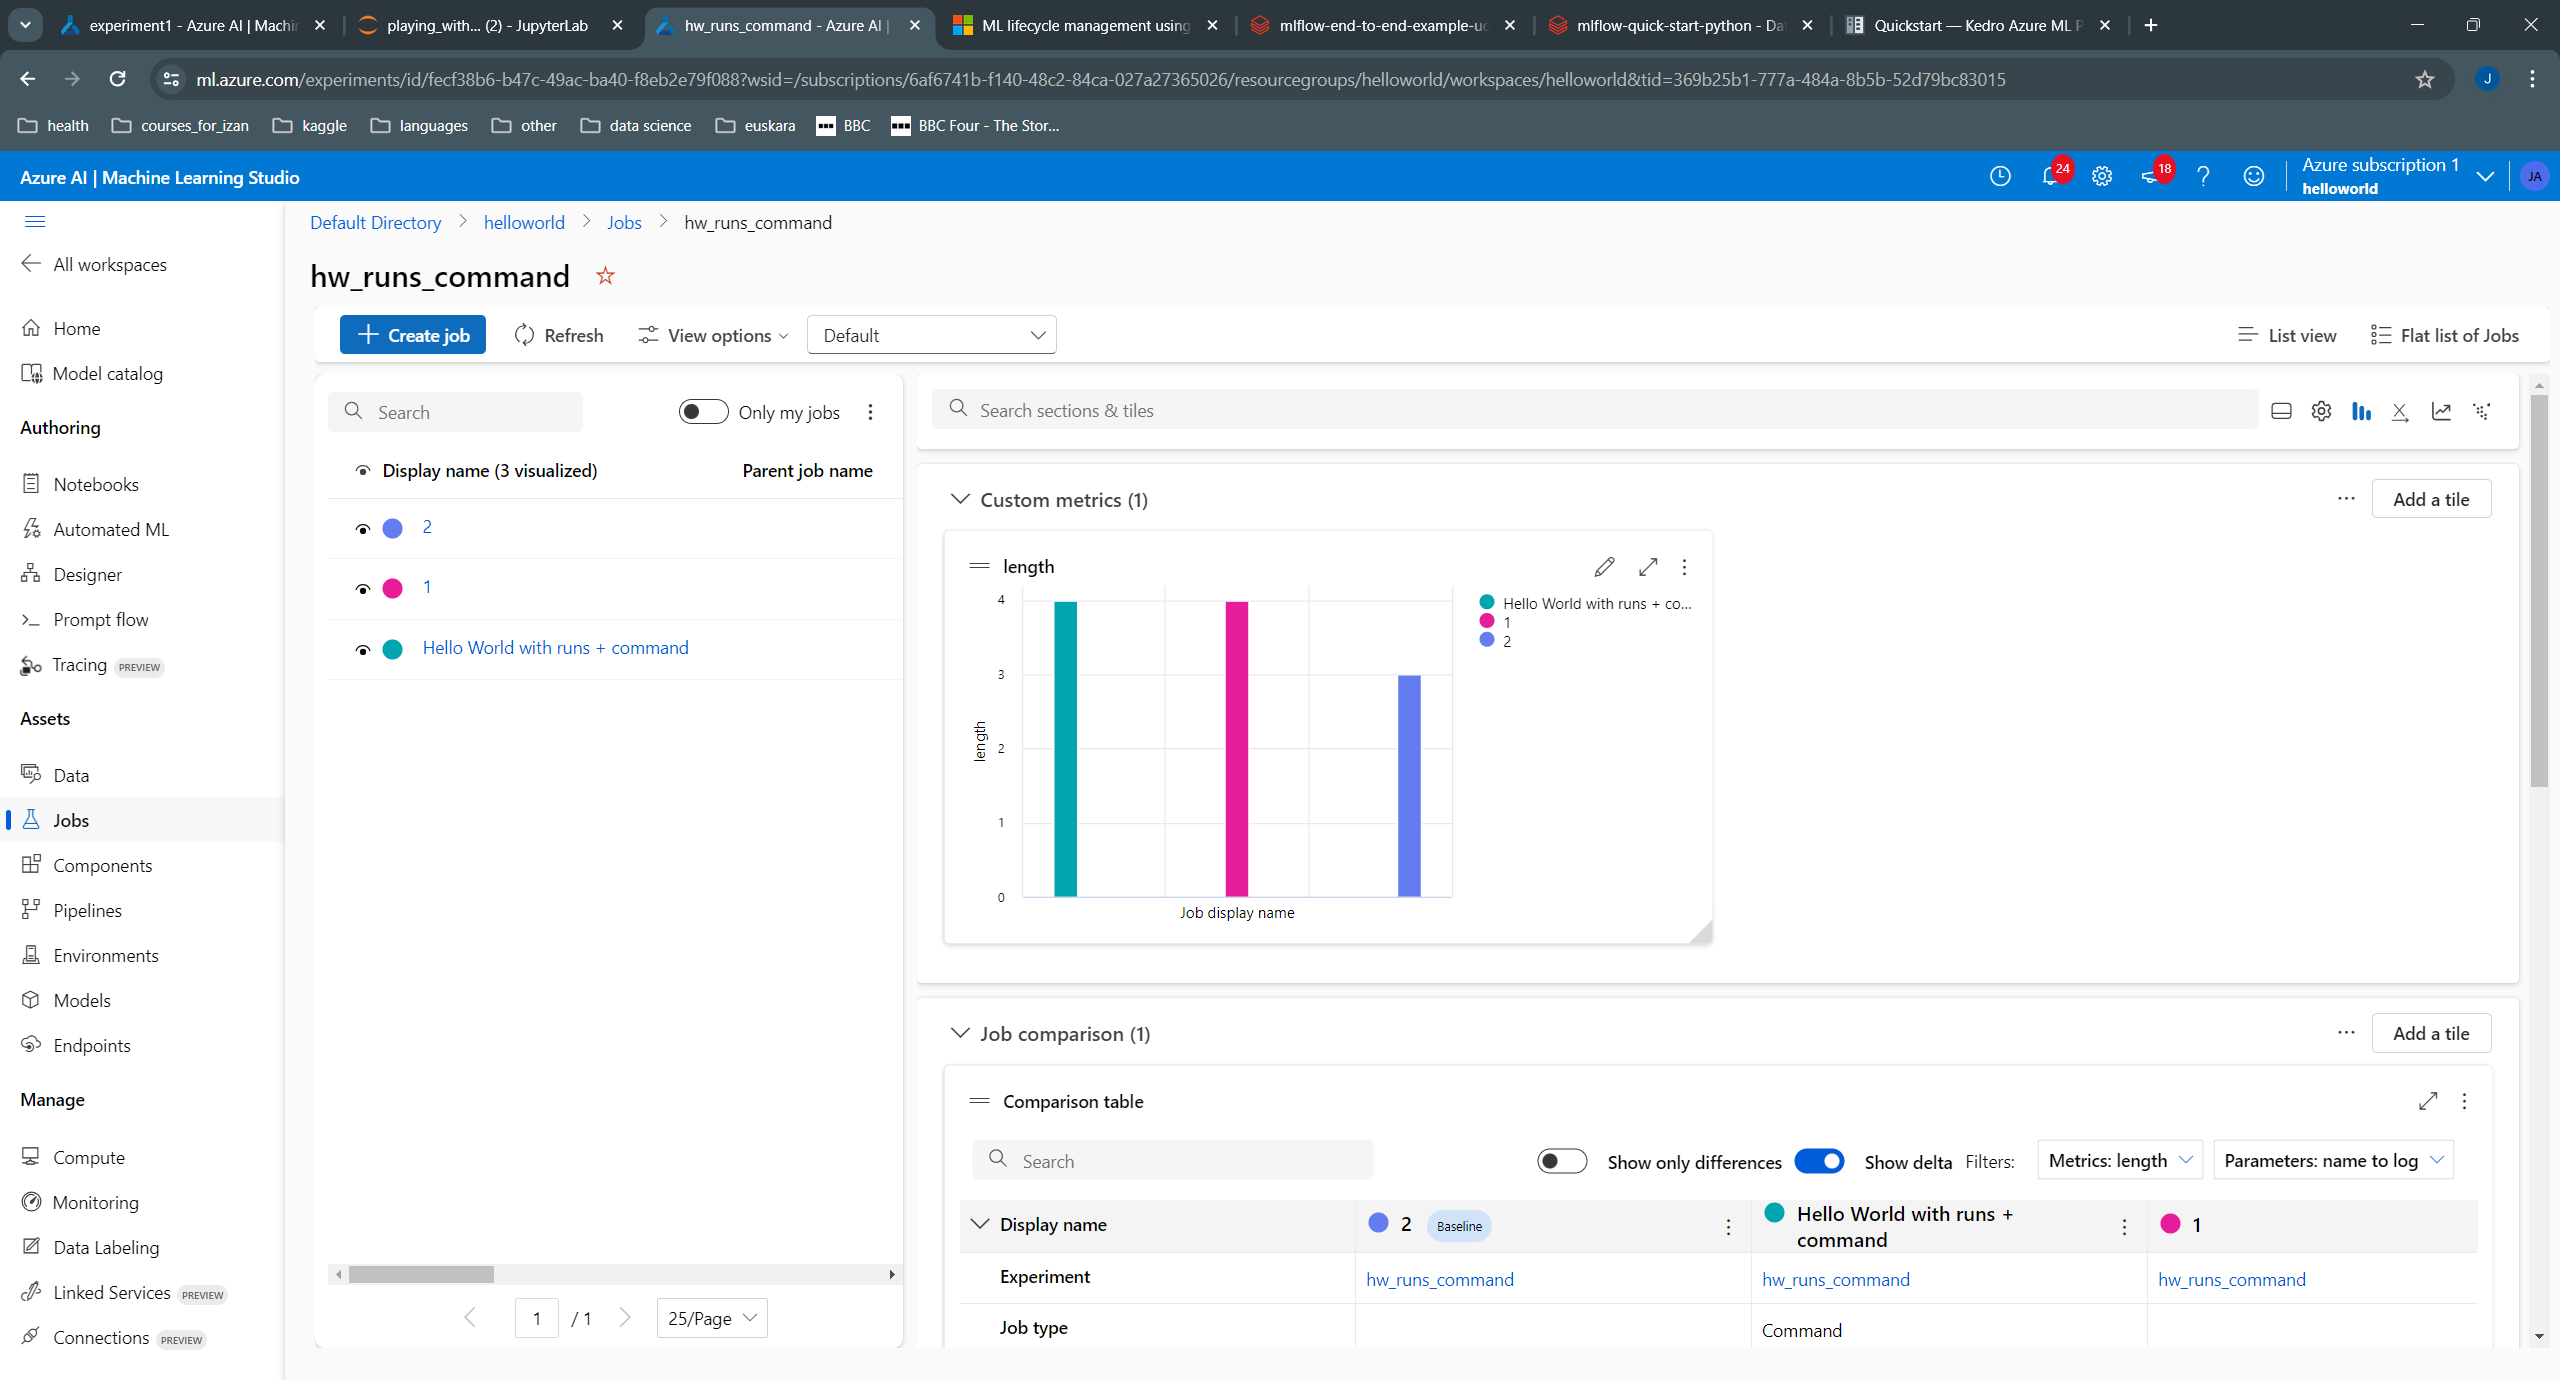

## Logging images

In [10]:
%%writefile hello_world_images.py
import mlflow
from hello_world_core import hello_world, parse_args
import matplotlib.pyplot as plt
    
def main():
    """Main function of the script."""
    
    names = ["John", "Mary", "Ana"]
    for idx, name in enumerate(names):
        mlflow.start_run(run_name=str(idx))
        mlflow.log_param ("name to log", name)
        mlflow.log_metric ("length", len(name))
        
        fig, ax = plt.subplots()
        ax.plot([0+10*len(name), 1+10*len(name)], [2+10*len(name), 3+10*len(name)])
        mlflow.log_figure(fig, f"figure_{idx}.png")
        
        mlflow.end_run ()
        hello_world (name)
    
if __name__ == "__main__":
    main()

Overwriting hello_world_images.py


In [11]:
# configure job
job = command(
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_images.py",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    experiment_name="hw_images",
    display_name="Hello World with images",
)

job.settings.default_compute = "jaumecpu"

# submit job
ml_client.create_or_update(job)

Warnings: [settings: Unknown field.]
Warnings: [settings: Unknown field.]
Uploading data_science (16.39 MBs): 100%|██████████| 16392540/16392540 [00:01<00:00, 14278614.03it/s]




Experiment,Name,Type,Status,Details Page
hw_images,shy_island_fh9jg0r6nf,command,Starting,Link to Azure Machine Learning studio


### Result

## Using interactive

2024/06/04 09:05:04 INFO mlflow.tracking.fluent: Experiment with name 'mlflow-interactive-4' does not exist. Creating a new experiment.


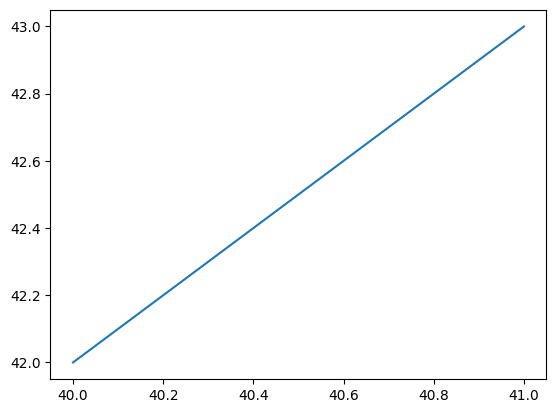

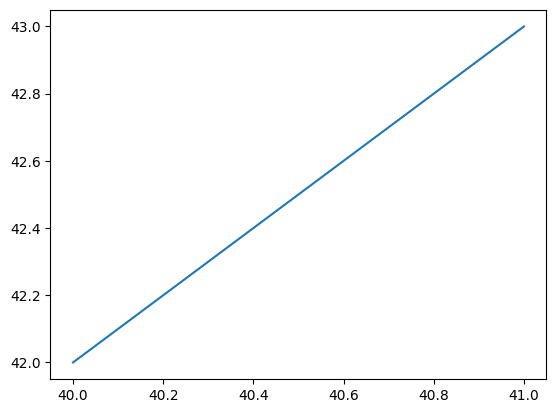

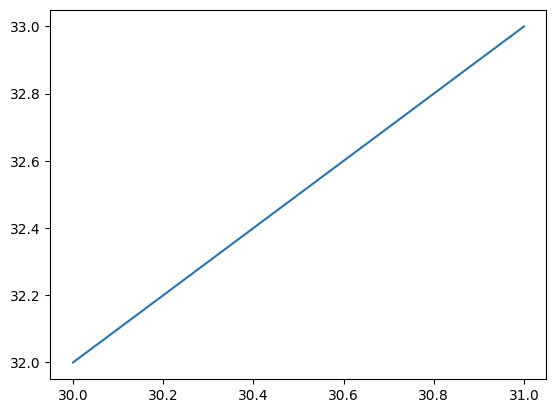

In [17]:
# Set the experiment
mlflow.set_experiment("mlflow-interactive-4")

names = ["John", "Mary", "Ana"]
for idx, name in enumerate(names):
    mlflow.start_run(run_name=str(idx)+"-bis-2")
    mlflow.log_param ("name to log", name)
    mlflow.log_metric ("length", len(name))

    fig, ax = plt.subplots()
    ax.plot([0+10*len(name), 1+10*len(name)], [2+10*len(name), 3+10*len(name)])
    mlflow.log_figure(fig, f"figure_{idx}.png")

    mlflow.end_run ()

## Multiple metrics

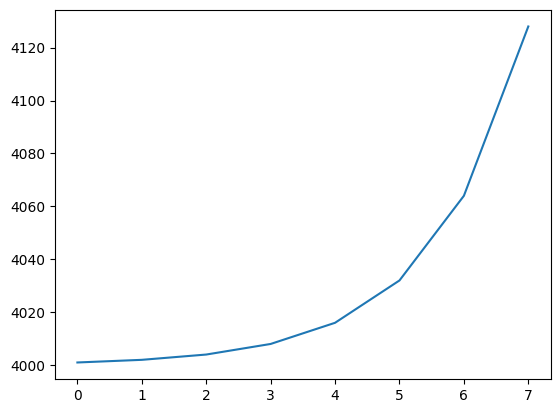

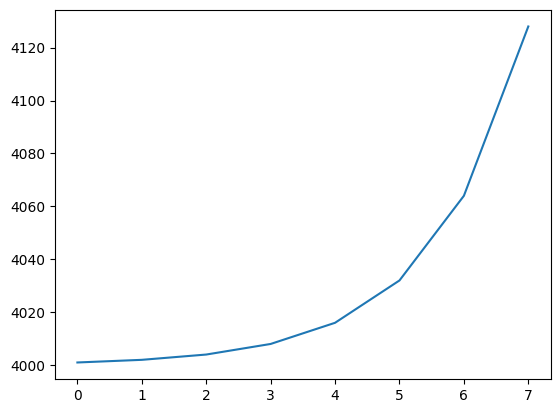

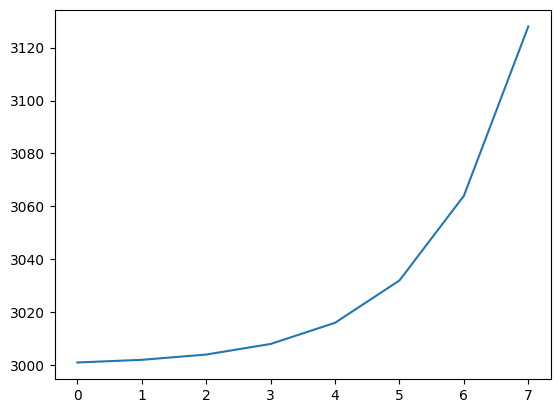

In [22]:
mlflow.set_experiment("multiple-metrics")
client = MlflowClient()

names = ["John", "Mary", "Ana"]
for idx, name in enumerate(names):
    current_run = mlflow.start_run(run_name=str(idx)+"-bis-2")
    mlflow.log_param ("name to log", name)
    mlflow.log_metric ("length", len(name))
    
    list_to_log = np.array([1, 2, 3, 2, 1, 2, 3, 2, 1])+len(name)*1000

    client.log_batch(
        current_run.info.run_id, 
        metrics=[
            Metric(key="sample_list", value=val, timestamp=int(time.time() * 1000), step=0) 
            for val in list_to_log
        ]
    )

    fig, ax = plt.subplots()
    ax.plot(np.array([1,2,4,8,16,32,64,128]) + len(name)*1000)
    mlflow.log_figure(fig, f"figure_{idx}.png")

    mlflow.end_run ()

## Using dataset

### auto-log, not using evaluate

### without set_experiment or run 

In [6]:
# enable autologging
mlflow.autolog()

# read data
dataset_source_url = "https://raw.githubusercontent.com/mlflow/mlflow/master/tests/datasets/winequality-white.csv"
df = pd.read_csv(dataset_source_url, delimiter=";")

# split data
y = df["quality"]
X = df.drop("quality", axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17
)

# train model
model = RandomForestClassifier ()
model.fit (X_train, y_train)

# evaluate
y_hat = model.predict(X_test)
acc = np.average(y_hat == y_test)
print('Accuracy:', acc)

2024/06/04 13:32:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/06/04 13:32:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '79f7182e-22da-49bc-9ffb-5d4d3ab19172', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/06/04 13:32:14 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': '8bf21ee6ca6b0a22621d463962cdb6c7', 'request': 'bb3b9eee5cc179d2'}, 'Environment': 'eastus2', 'Location': 'eastus2', 'Time': '2024-06-04T13:32:14.3398324+00:00', 'Compo

Accuracy: 0.6611008039579468


### with set_experiment or run 

In [9]:
mlflow.set_experiment("auto-log-diabetes")
current_run = mlflow.start_run(run_name="single-run")
    
# enable autologging
mlflow.autolog()

# read data
dataset_source_url = "https://raw.githubusercontent.com/mlflow/mlflow/master/tests/datasets/winequality-white.csv"
df = pd.read_csv(dataset_source_url, delimiter=";")

# split data
y = df["quality"]
X = df.drop("quality", axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17
)

# train model
model = RandomForestClassifier ()
model.fit (X_train, y_train)

# evaluate
y_hat = model.predict(X_test)
acc = np.average(y_hat == y_test)
print('Accuracy:', acc)

mlflow.end_run()

2024/06/04 13:42:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/06/04 13:42:34 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': '2ca9d0147eefa2c27982cd511b017688', 'request': '0c999aaf8b0221f2'}, 'Environment': 'eastus2', 'Location': 'eastus2', 'Time': '2024-06-04T13:42:34.8823005+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}


Accuracy: 0.6635745207173779


### with evaluate

In [5]:
mlflow.set_experiment("auto-log-evaluate")
current_run = mlflow.start_run(run_name="single-run")
    
# enable autologging
mlflow.autolog()

# read data
dataset_source_url = "https://raw.githubusercontent.com/mlflow/mlflow/master/tests/datasets/winequality-white.csv"
df = pd.read_csv(dataset_source_url, delimiter=";")

# split data
y = df["quality"]
X = df.drop("quality", axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17
)


# train model
model = RandomForestClassifier ()
model.fit (X_train, y_train)

# evaluate
y_hat = model.predict(X_test)

# --------------------------------------
eval_data = X_test
eval_data["label"] = y_test

# Assign the decoded predictions to the Evaluation Dataset
eval_data["predictions"] = y_hat

# Create the PandasDataset for use in mlflow evaluate
pd_dataset = mlflow.data.from_pandas(
    eval_data, predictions="predictions", targets="label"
)
result = mlflow.evaluate(data=pd_dataset, predictions=None, model_type="classifier")
#result = mlflow.evaluate(model=model, predictions=None, model_type="classifier")
# -------------------------------------

### with multiple runs

In [ ]:
#mlflow.end_run()
mlflow.set_experiment("shap-extra-runs")

# enable autologging
mlflow.autolog()
# read data
dataset_source_url = "https://raw.githubusercontent.com/mlflow/mlflow/master/tests/datasets/winequality-white.csv"
df = pd.read_csv(dataset_source_url, delimiter=";")
dataset: PandasDataset = mlflow.data.from_pandas(df, source=dataset_source_url)

# split data
y = df["quality"]
X = df.drop("quality", axis=1)

X = X[(y==6) | (y==5)]
y = y[(y==6) | (y==5)]
y[y==6]=1
y[y==5]=0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17
)

# hp
n_estimators_values = [25, 50, 100, 200]

for idx, n_estimators in enumerate (n_estimators_values):
    current_run = mlflow.start_run(run_name=f"run_{idx}")
    
    # train model
    model = RandomForestClassifier (n_estimators=n_estimators)
    model.fit (X_train, y_train)

    # --------------------------------------
    # evaluate
    #y_hat = model.predict(X_test)
    y_hat = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve (y_test, y_hat)
    thresholds = np.append (thresholds, values=1.0)
    threshold=thresholds[precision>0.7].min()
    y_hat = (y_hat>threshold).astype (int)

    # --------------------------------------
    eval_data = X_test.copy()
    eval_data["label"] = y_test

    # Assign the decoded predictions to the Evaluation Dataset
    eval_data["predictions"] = y_hat

    # Create the PandasDataset for use in mlflow evaluate
    pd_dataset = mlflow.data.from_pandas(
        eval_data, 
        predictions="predictions", 
        targets="label", 
        source=dataset_source_url, 
        name="wine-quality-white-3", 
    )
    
    result = mlflow.evaluate(data=pd_dataset, predictions=None, model_type="classifier")
    # -------------------------------------


    mlflow.end_run()

2024/06/05 08:38:38 INFO mlflow.tracking.fluent: Experiment with name 'shap-extra-runs' does not exist. Creating a new experiment.
2024/06/05 08:38:38 DEBUG mlflow.utils.autologging_utils: Called autolog() method for mlflow autologging with args '()' and kwargs '{'log_input_examples': False, 'log_model_signatures': True, 'log_models': True, 'log_datasets': True, 'disable': False, 'exclusive': False, 'disable_for_unsupported_versions': False, 'silent': False, 'extra_tags': None}'
2024/06/05 08:38:38 DEBUG mlflow.utils.autologging_utils: Called autolog() method for sklearn autologging with args '()' and kwargs '{'log_input_examples': False, 'log_model_signatures': True, 'log_models': True, 'log_datasets': True, 'disable': False, 'exclusive': False, 'disable_for_unsupported_versions': False, 'silent': False, 'max_tuning_runs': 5, 'log_post_training_metrics': True, 'serialization_format': 'cloudpickle', 'registered_model_name': None, 'pos_label': None, 'extra_tags': None}'
2024/06/05 08:38

#### Result

Originally, we wanted the previous run to include SHAP-based explanations and extra metrics. However, we faced two issues:

- In order to get SHAP explanations, the `mlflow.evaluate` function requires to get a model, which we didn't introduce. The model needs to be an MLFlow model, and we need to load it from the previous run. We'll try that below. We found this issue by setting the logger to DEBUG mode:
```python
import logging
logging.getLogger("mlflow").setLevel(logging.DEBUG)
```
- Extra metrics were a way to use a custom threshold, (precision>=0.7) for binarizing a list of predictions which were given as "probabilities" (from 0 to 1). However, the predictions provided in the `pd_dataset` object need to be binary, or `mlflow.evaluate` will fail. Therefore, we need to do the binarization before calling evaluate, and not as an extra metric.
- Apart from that, we failed to log the dataset used for training, which is actually the same than the one used for evaluation. I still need to figure out how to use a dataset that is only a subset of the data. Maybe the best approach is to log two inputs: one for the entire dataset and the other for the indexes of the splits.

### with shap, extra metrics, and multiple runs

In [3]:
def f1_at_70 (eval_df, _builtin_metrics):
    y_true = eval_df["target"]
    y_hat = eval_df["prediction"]
    precision, recall, thresholds = precision_recall_curve (y_true, y_hat)
    thresholds = np.append (thresholds, values=1.0)
    threshold=thresholds[precision>0.7].min()
    metrics = classification_report (y_true, y_hat>threshold, output_dict=True)
    return metrics['1']['f1-score']

f1_at_70_metric = mlflow.models.make_metric(
    eval_fn=f1_at_70,
    greater_is_better=True,
)

In [4]:
def fetch_logged_data(run_id):
    client = MlflowClient()
    data = client.get_run(run_id).data
    tags = {k: v for k, v in data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in client.list_artifacts(run_id, "model")]
    return data.params, data.metrics, tags, artifacts

# params, metrics, tags, artificats = fetch_logged_data (active_run.info.run_id)

In [5]:
# read data
dataset_source_url = "https://raw.githubusercontent.com/mlflow/mlflow/master/tests/datasets/winequality-white.csv"
df = pd.read_csv(dataset_source_url, delimiter=";")
dataset: mlflow.data.from_pandas(df, source=dataset_source_url)

# split data
y = df["quality"]
X = df.drop("quality", axis=1)

X = X[(y==6) | (y==5)]
y = y[(y==6) | (y==5)]
y[y==6]=1
y[y==5]=0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17
)

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/mlflow/data/dataset_source_registry.py:150: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'https://raw.githubusercontent.com/mlflow/mlflow/master/tests/datasets/winequality-white.csv'. Exception: 
  return _dataset_source_registry.resolve(


In [10]:
mlflow.end_run()

# enable autologging
mlflow.autolog()

2024/06/05 16:44:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [11]:
n_estimators_values = [25, 50, 100, 200]
idx=0
n_estimators=n_estimators_values[idx]
niter=16

current_run = mlflow.start_run(run_name=f"run_{idx}-{niter}")

#mlflow.log_input(dataset, context="training")

# train model
model = RandomForestClassifier (n_estimators=n_estimators)
model.fit (X_train, y_train)

y_hat = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve (y_test, y_hat)
thresholds = np.append (thresholds, values=1.0)
threshold=thresholds[precision>0.7].min()
y_hat = (y_hat>threshold).astype (int)

# --------------------------------------
#eval_data = X_test.copy()
#eval_data["label"] = y_test

# Assign the decoded predictions to the Evaluation Dataset
#eval_data["predictions"] = y_hat

# Create the PandasDataset for use in mlflow evaluate
X2 = X.copy()
X2["label"]=y
pd_dataset = mlflow.data.from_pandas(
    #X.assign(label=y), 
    X2,
    #predictions="predictions", 
    targets="label", 
    source=dataset_source_url, 
    name="wine-quality-white-15", 
)

model_uri = f"runs:/{current_run.info.run_id}/model"
result = mlflow.evaluate(model=model_uri, data=pd_dataset, predictions=None, model_type="classifier", extra_metrics=[f1_at_70_metric],
                        evaluator_config={"explainability_algorithm": "permutation"})
mlflow.end_run()

2024/06/05 16:45:02 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': 'e2aad112dfa9d4f79f01763ef0d7cc6f', 'request': '0a3dfd718ff25b82'}, 'Environment': 'eastus2', 'Location': 'eastus2', 'Time': '2024-06-05T16:45:02.6673091+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/mlflow/data/dataset_source_registry.py:150: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'https://raw.githubusercontent.com/mlflow/mlflow/master/tests/datasets/winequality-wh

In [ ]:
#https://learn.microsoft.com/en-us/azure/machine-learning/concept-mlflow?view=azureml-api-2#training-with-mlflow-projects-preview

In [12]:
# https://stackoverflow.com/questions/74656559/how-to-get-model-from-mlflow-from-run-id/78582321#78582321

In [ ]:
# read data
dataset_source_url = "https://raw.githubusercontent.com/mlflow/mlflow/master/tests/datasets/winequality-white.csv"
df = pd.read_csv(dataset_source_url, delimiter=";")
dataset: mlflow.data.from_pandas(df, source=dataset_source_url, name="wine-quality-white-3")

# split data
y = df["quality"]
X = df.drop("quality", axis=1)

X = X[(y==6) | (y==5)]
y = y[(y==6) | (y==5)]
y[y==6]=1
y[y==5]=0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17
)

# hp
n_estimators_values = [25, 50, 100, 200]

#mlflow.end_run()
mlflow.set_experiment("shap-2")

# enable autologging
mlflow.autolog()

for idx, n_estimators in enumerate (n_estimators_values):
    current_run = mlflow.start_run(run_name=f"run_{idx}")
    
    mlflow.log_input(dataset, context="training")
    
    # train model
    model = RandomForestClassifier (n_estimators=n_estimators)
    model.fit (X_train, y_train)

    # --------------------------------------
    # evaluate
    #y_hat = model.predict(X_test)
    y_hat = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve (y_test, y_hat)
    thresholds = np.append (thresholds, values=1.0)
    threshold=thresholds[precision>0.7].min()
    y_hat = (y_hat>threshold).astype (int)

    # Create the PandasDataset for use in mlflow evaluate   
    pd_dataset = mlflow.data.from_pandas(
        X.assign(label=y), 
        #predictions="predictions", 
        targets="label", 
        source=dataset_source_url, 
        name="wine-quality-white-12", 
    )
    
    model_uri = f"runs:/{current_run.info.run_id}/model"
    result = mlflow.evaluate(model=model_uri, data=pd_dataset, predictions=None, model_type="classifier",
                             evaluator_config={"explainability_algorithm": "permutation"})
    # -------------------------------------


    mlflow.end_run()

Caveats:

    - Use same dataset as the original one, including both training and test sets??
    - Do include the column for labels
    - But do not include the one for predictions.
    - While the evaluate model succeeds, it doesn't actually run SHAP well if we use the default Explainer:
    
```
    Reason: ExplainerError('Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.160800, while the model output was 0.080000. If this difference is acceptable you can set check_additivity=False to disable this check.'). Set logging level to DEBUG to see the full traceback.
<Figure size 1050x700 with 0 Axes>
```

    - One solution to the above is to use a different type of Explainer. I used that solution above, based on `permutation`, since `kernel` is too slow. We can either sample or use a different kernel.
    
    - Logging the input with context training doesn't prevent the autolog from logging an additional input with path `dummy`...

It seems we can either use `check_additivity = False`:

https://github.com/shap/shap/issues/2777

Or use another type of Explainer, e.g., kernel-based

## Try

- create_experiment followed by set_experiment

https://mlflow.org/docs/latest/tracking.html#tracking-runs

https://learn.microsoft.com/en-us/azure/machine-learning/how-to-log-view-metrics?view=azureml-api-2&tabs=interactive#log-images

https://www.databricks.com/notebooks/gallery/MLflowLoggingAPIPythonQuickstart.html


## Next steps

- https://mlflow.org/docs/latest/traditional-ml/hyperparameter-tuning-with-child-runs/index.html
- https://mlflow.org/docs/latest/tracking/tutorials/local-database.html#:~:text=In%20this%20tutorial%2C%20you%20will,of%20a%20simple%20access%20interface.m

## Links

- My own answer in Stack Overflow:

https://stackoverflow.com/a/78582321/19850415

